# FEATURE SELECTION B

In [64]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# data directory
DATA_DIR = '.'
data_paths = {
              'B': {'train': os.path.join(DATA_DIR, 'B', 'B_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'B', 'B_hhold_test.csv'),
                    'ind_train':os.path.join(DATA_DIR, 'B', 'B_indiv_train.csv'),
                    'ind_test':os.path.join(DATA_DIR, 'B', 'B_indiv_test.csv')
                   }}
                                          
                                          
                
# load training data
b_train = pd.read_csv(data_paths['B']['train'], index_col='id')
b_train_ind=pd.read_csv(data_paths['B']['ind_train'], index_col='id')

# load test data
b_test = pd.read_csv(data_paths['B']['test'], index_col='id')
b_test_ind = pd.read_csv(data_paths['B']['ind_test'], index_col='id')


b_train_ind.poor=b_train_ind.poor.astype('int')
b_train.poor=b_train.poor.astype('int')
b_train.head()


RzaXNcgd LfWEhutI jXOqJdNL  wJthinfa PTLgvdlQ  ZvEApWrk euTESpHe  \
id                                                                       
57071    zTghO    pYfmQ    lNhMv        42    RQnVj       103    jpSeC   
18973    zTghO    pYfmQ    lNhMv        34    iuxWN        -2    OLVWN   
20151    zTghO    pYfmQ    lNhMv        34    iuxWN       313    OMRWa   
5730     zTghO    pYfmQ    lNhMv        58    iuxWN       138    jpSeC   
35033    zTghO    pYfmQ    lNhMv       122    iuxWN        68    OLVWN   

      bDVMMSYY aSzMhjgD ZehDbxxy   ...   YVMuyCUV AZVtosGB toZzckhe BkiXyuSp  \
id                                 ...                                         
57071    FDqwJ    rxJJI    IbWRL   ...      nZcTi    pdvWY    LLuZj    qpzpO   
18973    FDqwJ    ufugi    IbWRL   ...      nZcTi    XrijK    LLuZj    qpzpO   
20151    FDqwJ    rxJJI    IbWRL   ...      nZcTi    FEjSW    lmjln    qpzpO   
5730     FDqwJ    rxJJI    IbWRL   ...      nZcTi    XrijK    lmjln    ZZzXr   
35033    FDqwJ    rxJJI    IbWRL   ...      nZcTi    CRHYU    lmjln    qpzpO   

      ggucvVUs VMvwrYds VlNidRNP rljjAmaN ChbSWYhO country  
id                                                          
57071    kZRgh    VwGOP    DScEf    SKBnS    Enull       B  
18973    kZRgh    VwGOP    JOdCB    SKBnS    Enull       B  
20151    kZRgh    VwGOP    JOdCB    SKBnS    Enull       B  
5730     kZRgh    VwGOP    ZwQQe    SKBnS    Enull       B  
35033    kZRgh    VwGOP    WFgZH    SKBnS    Enull       B  

[5 rows x 442 columns]

In [65]:
b_train.reset_index(level=0, inplace=True)
b_train_ind.reset_index(level=0, inplace=True)
b_test.reset_index(level=0, inplace=True)
b_test_ind.reset_index(level=0, inplace=True)


def aggregate_ind(ind_df,household_df):
    df=pd.DataFrame(ind_df.groupby('id',as_index=False).iid.count())
    df.columns=['id','count_qns']
    household_df=household_df.merge(df,left_on='id',right_on='id')
    return household_df

b_train=aggregate_ind(b_train_ind,b_train)
b_test=aggregate_ind(b_test_ind,b_test)
b_poor=b_train.poor
b_id=b_train['id']
b_test_id=b_test['id']
print(b_train.shape,b_train_ind.shape)
print(b_test.shape,b_test_ind.shape)
b_train.head()

(3255, 444) (20252, 227)
(1604, 443) (10066, 226)


id RzaXNcgd LfWEhutI jXOqJdNL  wJthinfa PTLgvdlQ  ZvEApWrk euTESpHe  \
0  57071    zTghO    pYfmQ    lNhMv        42    RQnVj       103    jpSeC   
1  18973    zTghO    pYfmQ    lNhMv        34    iuxWN        -2    OLVWN   
2  20151    zTghO    pYfmQ    lNhMv        34    iuxWN       313    OMRWa   
3   5730    zTghO    pYfmQ    lNhMv        58    iuxWN       138    jpSeC   
4  35033    zTghO    pYfmQ    lNhMv       122    iuxWN        68    OLVWN   

  bDVMMSYY aSzMhjgD    ...    AZVtosGB toZzckhe BkiXyuSp ggucvVUs VMvwrYds  \
0    FDqwJ    rxJJI    ...       pdvWY    LLuZj    qpzpO    kZRgh    VwGOP   
1    FDqwJ    ufugi    ...       XrijK    LLuZj    qpzpO    kZRgh    VwGOP   
2    FDqwJ    rxJJI    ...       FEjSW    lmjln    qpzpO    kZRgh    VwGOP   
3    FDqwJ    rxJJI    ...       XrijK    lmjln    ZZzXr    kZRgh    VwGOP   
4    FDqwJ    rxJJI    ...       CRHYU    lmjln    qpzpO    kZRgh    VwGOP   

  VlNidRNP rljjAmaN ChbSWYhO country count_qns  
0    DScEf    SKBnS    Enull       B         6  
1    JOdCB    SKBnS    Enull       B         5  
2    JOdCB    SKBnS    Enull       B         5  
3    ZwQQe    SKBnS    Enull       B         8  
4    WFgZH    SKBnS    Enull       B        16  

[5 rows x 444 columns]

In [66]:
b_train.drop(['id','poor','country'],axis=1,inplace=True)
b_test.drop(['id','country'],axis=1,inplace=True)

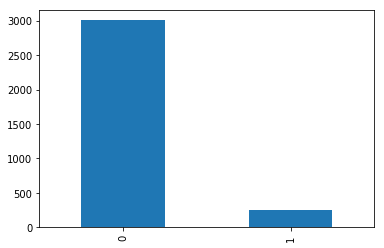

In [67]:
b_poor.value_counts().plot(kind='bar')

In [68]:
from util import *


print("\nCountry B")

cols=[i for i in b_train.columns if i not in ['id','poor']]
aX_train = pre_process_data(b_train.loc[:,cols])

bX_train = pre_process_data(b_train)
by_train = np.ravel(b_poor)

print("\nCountry B test")

bX_test=pre_process_data(b_test,enforce_cols=bX_train.columns)


print(bX_train.shape,bX_test.shape)
bX_train.head()


Country B
Input shape:	(3255, 441)
After standardization (3255, 441)
After converting categoricals:	(3255, 1432)
Input shape:	(3255, 441)
After standardization (3255, 441)
After converting categoricals:	(3255, 1432)

Country B test
Input shape:	(1604, 441)
After standardization (1604, 441)
After converting categoricals:	(1604, 1419)
(3255, 1432) (1604, 1432)


wJthinfa  ZvEApWrk  vuQrLzvK  FGWqGkmD  qrOrXLPM  BXOWgPgL  umkFMfvA  \
0 -0.060772  0.065928  0.687955       0.0 -0.890950  0.000000       0.0   
1 -0.412754 -0.928796  1.034898       0.0 -0.890950  0.000000       0.0   
2 -0.412754  2.055376  1.104287       0.0  0.258037  0.000000       0.0   
3  0.643192  0.397503 -1.130026       0.0  0.258037 -0.067086       0.0   
4  3.459047 -0.265647 -0.991249       0.0  0.258037 -1.271564       0.0   

   McFBIGsm  NjDdhqIe  rCVqiShm       ...        rljjAmaN_aGlDf  \
0  0.000000  0.087650  0.569923       ...                     0   
1  0.000000 -0.891198  0.192433       ...                     0   
2  0.000000  2.045347  0.720918       ...                     0   
3  0.024975  0.413933  0.003688       ...                     0   
4 -1.899275 -0.238632  0.381178       ...                     0   

   rljjAmaN_akDoa  rljjAmaN_fEsQq  rljjAmaN_gPPdN  ChbSWYhO_BgSQe  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   ChbSWYhO_Enull  ChbSWYhO_LgZDV  ChbSWYhO_OPpaN  ChbSWYhO_fWqni  \
0               1               0               0               0   
1               1               0               0               0   
2               1               0               0               0   
3               1               0               0               0   
4               1               0               0               0   

   ChbSWYhO_zmaYX  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 1432 columns]

In [69]:
from sklearn.feature_selection import VarianceThreshold
bX_train['poor']=b_poor

print("Remove 0 variance")

b_train_df=remove_feat_constants(bX_train)
b_train_df.drop('poor',axis=1,inplace=True)
cols=b_train_df.columns
b_test_df=bX_test.loc[:,cols]

Remove 0 variance
Delete  Index(['ZehDbxxy_IbWRL', 'qNlGOBmo_XyOZw', 'izDpdZxF_vJCXM', 'dsUYhgai_bsaua'], dtype='object')
  - Deleted 4 / 1433 features (~= 0.3 %)


# Fix imbalance

from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(by_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(by_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(b_train_df, by_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

bX_train_smote=pd.DataFrame(X_train_res)
bY_train_smote=pd.DataFrame(y_train_res)
bX_train_smote.columns=b_train_df.columns
bY_train_smote.columns=['poor']
print(bX_train_smote.shape,bY_train_smote.shape)
X=bX_train_smote
y=bY_train_smote
y.poor.values

# #1. Tree Based Ranking

We can fit a classfier to each feature and rank the predictive power. This method selects the most powerful features individually but ignores the predictive power when features are combined.

Random Forest Classifier is used in this case because it is robust, nonlinear, and doesn't require scaling.


In [58]:
X=b_train_df
y=by_train
X_test=b_test_df

X_test.shape,X.shape

((1604, 1428), (3255, 1428))

In [70]:
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sys
sys.path.append('/Users/priya/xgboost/python-package') 
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
clf = ExtraTreesClassifier()
clf = clf.fit(X,y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_test_new=model.transform(b_test_df)


print(X_new.shape,X_test_new.shape,X.shape)

#All features
def runAgainstClassifiers(X,y):
    Classifiers = [
                RandomForestClassifier(n_estimators=200),
                LogisticRegression(penalty='l1',C=1),
                LogisticRegression(penalty='l2',C=1),
                LogisticRegression(),
                LogisticRegression(C=0.1,solver='liblinear',max_iter=200),
                GradientBoostingClassifier(n_estimators=200),
                xgb.XGBClassifier()]


    skf = StratifiedKFold( n_splits=2,shuffle=True, random_state=42)
    log_loss_map={}

    for clf in Classifiers:

        log_loss_clf=[]
        for train_index, test_index in skf.split(X,y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
            clf.fit(X_train,y_train)
            pred1=(clf.predict_proba(X_test)[:,1])
            log_loss_clf.append(log_loss(y_test,pred1))
        print(clf.__class__.__name__,np.mean(log_loss_clf))
        log_loss_map[clf.__class__.__name__]=np.mean(log_loss_clf)
  
print("No feature selection")
runAgainstClassifiers(pd.DataFrame(X),y)

(3255, 565) (1604, 565) (3255, 1428)
No feature selection
RandomForestClassifier 0.243786693114
LogisticRegression 0.317608985317
LogisticRegression 0.395012183299
LogisticRegression 0.395012183299
LogisticRegression 0.246441300068
GradientBoostingClassifier 0.253239293857
XGBClassifier 0.225391820728


In [71]:
runAgainstClassifiers(pd.DataFrame(X_new),y)

RandomForestClassifier 0.226298713238
LogisticRegression 0.320759232862
LogisticRegression 0.380949301358
LogisticRegression 0.380949301358
LogisticRegression 0.236199915434
GradientBoostingClassifier 0.256236058892
XGBClassifier 0.225704183215


# L1 Based

In [72]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X,y)
model_2 = SelectFromModel(lsvc, prefit=True)
X_lasoo = model_2.transform(X)
X_test_lasoo=model_2.transform(b_test_df)

print("L1 based feature selection")
runAgainstClassifiers(pd.DataFrame(X_lasoo),y)

L1 based feature selection
RandomForestClassifier 0.235808560901
LogisticRegression 0.213878230092
LogisticRegression 0.218202764583
LogisticRegression 0.218202764583
LogisticRegression 0.212961194861
GradientBoostingClassifier 0.240824069856
XGBClassifier 0.214637250738


# L2 BASED FEATURESELCTION

In [73]:


from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l2", dual=False).fit(X,y)
model_3 = SelectFromModel(lsvc, prefit=True)
X_ridge = model_3.transform(X)
X_test_ridge=model_3.transform(b_test_df)

print("L2 based feature selection")
runAgainstClassifiers(pd.DataFrame(X_ridge),y)


L2 based feature selection
RandomForestClassifier 0.233535532767
LogisticRegression 0.244511052038
LogisticRegression 0.243925580755
LogisticRegression 0.243925580755
LogisticRegression 0.193652513543
GradientBoostingClassifier 0.242095342519
XGBClassifier 0.219837849338


In [80]:
# instantiate a class that choses features based
# on feature importances according to the fitting phase
# of a separate decision tree classifier
from sklearn.model_selection import GridSearchCV

lsvc = LinearSVC(C=0.01, penalty="l2", dual=False)
select = SelectFromModel(lsvc)
from sklearn.pipeline import Pipeline
lr = LogisticRegression()

pipe = Pipeline([('select', select),
                  ('lr', lr)])

params={
 'select__threshold': [ 0.01,.1,  "mean", "median", "2.*mean"],
 
    'lr__C' : [0.001,0.01,0.1,1,10,100],
    'lr__penalty' : ['l1','l2'] }


clf = GridSearchCV(pipe,params, cv=5,verbose=2)
clf.fit(X,y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.01 .............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.01, total=   0.3s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.01 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.01, total=   0.3s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.01 .............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.01, total=   0.3s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.01 .............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.01, total=   0.3s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.01 .............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.01, total=   0.3s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.1 ..............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.1, total=   0.3s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.1 ..............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.1, total=   0.2s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.1 ..............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.1, total=   0.3s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.1 ..........

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('select', SelectFromModel(estimator=LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
        norm_order=1, prefit=False, th...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'select__threshold': [0.01, 0.1, 'mean', 'median', '2.*mean'], 'lr__C': [0.001, 0.01, 0.1, 1, 10, 100], 'lr__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [84]:
clf.best_params_

{'lr__C': 0.01, 'lr__penalty': 'l2', 'select__threshold': 0.01}

In [90]:
lsvc = LinearSVC(C=0.01, penalty="l2", dual=False).fit(X,y)
model_3 = SelectFromModel(lsvc,prefit=True)
X_ridge = pd.DataFrame(model_3.transform(X))
X_test_ridge=model_3.transform(b_test_df)

print("L2 based feature selection")
skf = StratifiedKFold( n_splits=2,shuffle=True, random_state=42)

lr=LogisticRegression(C=0.01,penalty='l2')
log_loss_clf=[]
for train_index, test_index in skf.split(X_ridge,y):
            X_train, X_test = X_ridge.iloc[train_index], X_ridge.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
            clf.fit(X_train,y_train)
            pred1=(clf.predict_proba(X_test)[:,1])
            log_loss_clf.append(log_loss(y_test,pred1))
print(clf.__class__.__name__,np.mean(log_loss_clf))
np.mean(log_loss_clf)

L2 based feature selection
Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.01 .............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.01, total=   0.0s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.01 .............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.01, total=   0.0s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.01 .............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.01, total=   0.0s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.01 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.01, total=   0.1s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.01 .............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.01, total=   0.1s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.1 ..............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.1, total=   0.0s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.1 ..............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.1, total=   0.0s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.1 ..............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.1, total=   0.0s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.1 ..............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.1, total=   0.0s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.1 ..............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.1, total=   0.0s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=mean ...........

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   28.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.01, total=   0.0s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.01 .............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.01, total=   0.0s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.01 .............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.01, total=   0.0s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.1 ..............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.1, total=   0.0s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.1 ..............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.1, total=   0.0s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.1 ..............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.1, total=   0.0s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.1 ..............
[CV]  lr__C=0.001, lr__penalty=l1, select__threshold=0.1, total=   0.0s
[CV] lr__C=0.001, lr__penalty=l1, select__threshold=0.1 ...........

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   24.7s finished


0.19379141236102426

# Boruta

In [75]:
import sys
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, n_jobs=4, class_weight='balanced',max_depth=6)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
boruta_selector.fit(X.as_matrix(), y)

# number of selected features
print ('\n Number of selected features:')
print (boruta_selector.n_features_)

feature_df = pd.DataFrame(X.columns.tolist(), columns=['features'])
feature_df['rank']=boruta_selector.ranking_
feature_df = feature_df.sort_values('rank', ascending=True).reset_index(drop=True)
print ('\n Top %d features:' % boruta_selector.n_features_)
print (feature_df.head(boruta_selector.n_features_))
boruta_feats=(feature_df.head(boruta_selector.n_features_)).features.tolist()
boruta_feats.remove('poor')

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	1428
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	1428
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	1428
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	1428
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	1428
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	1428
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	1428
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	93
Rejected: 	1335


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	77
Rejected: 	1335


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	77
Rejected: 	1335


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	77
Rejected: 	1335


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	63
Rejected: 	1349


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	63
Rejected: 	1349


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	63
Rejected: 	1349


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	63
Rejected: 	1349


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	58
Rejected: 	1354


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	16
Tentative: 	58
Rejected: 	1354


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	16
Tentative: 	58
Rejected: 	1354


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	16
Tentative: 	54
Rejected: 	1358


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	16
Tentative: 	54
Rejected: 	1358


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	16
Tentative: 	54
Rejected: 	1358


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	17
Tentative: 	53
Rejected: 	1358


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	17
Tentative: 	51
Rejected: 	1360


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	17
Tentative: 	51
Rejected: 	1360


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	17
Tentative: 	51
Rejected: 	1360


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	17
Tentative: 	47
Rejected: 	1364


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	17
Tentative: 	47
Rejected: 	1364


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	17
Tentative: 	47
Rejected: 	1364


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	17
Tentative: 	44
Rejected: 	1367


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	17
Tentative: 	44
Rejected: 	1367


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	17
Tentative: 	44
Rejected: 	1367


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	17
Tentative: 	40
Rejected: 	1371


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	17
Tentative: 	40
Rejected: 	1371


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	17
Tentative: 	9
Rejected: 	1402


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	17
Tentative: 	9
Rejected: 	1402


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	17
Tentative: 	9
Rejected: 	1402


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	17
Tentative: 	7
Rejected: 	1404


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	17
Tentative: 	7
Rejected: 	1404


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	17
Tentative: 	7
Rejected: 	1404


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	1405


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	1405


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	1405


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	1406


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	1406


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	1406


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	1406


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	1406


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	17
Tentative: 	5
Rejected: 	1406


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	17
Tentative: 	3
Rejected: 	1408


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	17
Tentative: 	3
Rejected: 	1408


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	17
Tentative: 	3
Rejected: 	1408


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	17
Tentative: 	3
Rejected: 	1408


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	17
Tentative: 	3
Rejected: 	1408


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	17
Tentative: 	3
Rejected: 	1408


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	17
Tentative: 	3
Rejected: 	1408


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	17
Tentative: 	3
Rejected: 	1408


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	17
Tentative: 	3
Rejected: 	1408


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	17
Tentative: 	3
Rejected: 	1408


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	71 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	74 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	80 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	81 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	82 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	83 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	84 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	85 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	86 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	87 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	88 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	89 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	90 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	91 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	92 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	93 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	94 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	95 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	96 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	97 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	98 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409
Iteration: 	99 / 100
Confirmed: 	17
Tentative: 	2
Rejected: 	1409


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	17
Tentative: 	0
Rejected: 	1409

 Number of selected features:
17

 Top 17 features:
          features  rank
0         wJthinfa     1
1   XzxOZkAn_NSjXr     1
2   dJtIrSdi_nWMpa     1
3         GrLBZowF     1
4   TChiqwQp_Mfwmc     1
5   toNGbjGF_Lznij     1
6        count_qns     1
7   BdZukZjf_BQmFT     1
8   TbDUmaHA_GHRZs     1
9   vmLrLHUf_vlCkx     1
10  BjWMmVMX_mqcBm     1
11  TbDUmaHA_QHiPm     1
12  frkmPrFd_aSNWV     1
13        qrOrXLPM     1
14        vuQrLzvK     1
15  DwxXAlcv_OIQEg     1
16  XzxOZkAn_OYPbi     1


/Users/priya/anaconda/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


ValueError: list.remove(x): x not in list

In [76]:
X_new_b=X.loc[:,boruta_feats]
X_test_b=b_test_df.loc[:,boruta_feats]
runAgainstClassifiers(pd.DataFrame(X_new_b),y)


RandomForestClassifier 0.341876356389
LogisticRegression 0.215876768495
LogisticRegression 0.216266120057
LogisticRegression 0.216266120057
LogisticRegression 0.218245186268
GradientBoostingClassifier 0.258991971786
XGBClassifier 0.22968906445


Boruta classifier


{'GradientBoostingClassifier': 0.11815968072852774,
 'LogisticRegression': 0.26620545857899103,
 'RandomForestClassifier': 0.14360498792556739,
 'XGBClassifier': 0.1212668654065536}

print(X_train.shape,X_test.shape,X.shape,y_train.shape,y_test.shape)
from sklearn.ensemble import RandomForestClassifier
import sys
sys.path.append('/Users/priya/xgboost/python-package')
import xgboost as xgb
from sklearn.metrics import log_loss
from sklearn import cross_validation, metrics   #Additional scklearn functions
def modelfit(alg, dtrain,ytrain,dtest,ytest, useTrainCV=True, cv_folds=5, early_stopping_rounds=30):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain, label=ytrain.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='logloss', early_stopping_rounds=early_stopping_rounds,verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    
    eval_set = [(dtest, ytest)]

    #Fit the algorithm on the data
    alg.fit(dtrain, ytrain,eval_metric='logloss', eval_set=eval_set,early_stopping_rounds=early_stopping_rounds)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
    dtest_predprob=alg.predict_proba(dtest)[:,1]
    
    print(dtest_predprob.shape)
    print("log loss in train",log_loss(ytrain.values,dtrain_predprob))
    print("log loss in test",log_loss(ytest.values,dtest_predprob))

    #Print model report:
    print ("Accuracy : %.4g" % metrics.accuracy_score(ytrain.values, dtrain_predictions))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    
xgb1 = xgb.XGBClassifier( learning_rate=0.1,
                         n_estimators=100,
                         max_depth=5,
                         
                         objective='binary:logistic')


modelfit(xgb1, X_train,y_train, X_test,y_test)



In [308]:

runClassifiers(X_train,y_train,X_test,y_test)

{'GradientBoostingClassifier': 0.11740638615481117,
 'LogisticRegression': 0.30782596889116548,
 'RandomForestClassifier': 0.14453412883658281,
 'XGBClassifier': 0.12023435677488607}

In [290]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X,y.poor)
model_2 = SelectFromModel(lsvc, prefit=True)
X_lasoo = model_2.transform(X)
print(X_lasoo.shape)

(6008, 151)


In [298]:
X_test_lasoo=model_2.transform(b_test_df)
print(X_test_lasoo.shape)

(1604, 151)


In [294]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X_lasoo, y.poor, test_size=0.33, random_state=42)
print(X_train_l.shape,X_test_l.shape,y_train_l.shape,y_test_l.shape,X_test_l.shape)
runClassifiers(X_train_l,y_train_l,X_test_l,y_test_l)

(4025, 151) (1983, 151) (4025,) (1983,) (1983, 151)


{'GradientBoostingClassifier': 0.11107196236748469,
 'LogisticRegression': 0.29425199042856787,
 'RandomForestClassifier': 0.14114755374910254,
 'XGBClassifier': 0.11891917296907424}

In [295]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb_params = {
    'n_estimators' : [100,200,300],
    'learning_rate' : [.1,.2,.3],
    'max_depth' : [3,5,7]
}

gb_class = GradientBoostingClassifier()

gb_grid = GridSearchCV(gb_class, gb_params, cv = 5, verbose=2)
gb_grid.fit(X_train_l,y_train_l)

gb_grid.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=100, total=   2.3s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] . learning_rate=0.1, max_depth=3, n_estimators=100, total=   2.4s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=100, total=   5.4s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=100, total=   4.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=100, total=   3.6s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=200, total=   5.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=200, total=   4.8s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200 ................
[CV] . learning_rate=0.1, max_depth=3, n_estimators=200, total=   4.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=200 ................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 16.3min finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [296]:
gbm=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

gbm.fit(X_lasoo,y.poor)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [302]:
b_test

RzaXNcgd LfWEhutI jXOqJdNL  wJthinfa PTLgvdlQ  ZvEApWrk euTESpHe  \
0       zTghO    pYfmQ    lNhMv -0.749544    iuxWN -0.719298    OLVWN   
1       zTghO    pYfmQ    lNhMv  0.615895    iuxWN  0.371780    FzqeU   
2       zTghO    pYfmQ    lNhMv -0.749544    iuxWN -0.537452    OLVWN   
3       zTghO    pYfmQ    lNhMv  0.274535    iuxWN  0.068703    OLVWN   
4       zTghO    BucnG    lNhMv  0.615895    iuxWN -0.234375    OLVWN   
5       zTghO    pYfmQ    yLRKG -0.749544    iuxWN -0.234375    OLVWN   
6       zTghO    pYfmQ    lNhMv  0.274535    BALIg  1.887166    OLVWN   
7       zTghO    pYfmQ    lNhMv -0.408185    RQnVj -0.537452    OLVWN   
8       zTghO    pYfmQ    lNhMv -1.432264    iuxWN -0.234375    OLVWN   
9       zTghO    pYfmQ    lNhMv  0.957254    iuxWN  0.371780    OLVWN   
10      zTghO    pYfmQ    lNhMv -0.749544    iuxWN -0.537452    OLVWN   
11      zTghO    pYfmQ    lNhMv  0.615895    RQnVj -0.234375    OLVWN   
12      zTghO    pYfmQ    lNhMv -0.066825    RQnVj -0.719298    OMRWa   
13      zTghO    pYfmQ    lNhMv  0.274535    iuxWN -0.234375    OLVWN   
14      zTghO    pYfmQ    yLRKG  0.615895    RQnVj  0.068703    OMRWa   
15      zTghO    pYfmQ    lNhMv  0.957254    iuxWN -0.537452    OMRWa   
16      zTghO    pYfmQ    lNhMv  1.639974    iuxWN  0.977934    OMRWa   
17      zTghO    pYfmQ    lNhMv -1.773623    iuxWN -0.537452    OMRWa   
18      zTghO    pYfmQ    lNhMv -0.066825    iuxWN  0.068703    OLVWN   
19      zTghO    pYfmQ    lNhMv -0.066825    iuxWN -0.234375    OLVWN   
20      zTghO    pYfmQ    lNhMv -0.749544    iuxWN -0.234375    OLVWN   
21      zTghO    pYfmQ    lNhMv  0.957254    RQnVj -0.234375    jpSeC   
22      zTghO    pYfmQ    lNhMv -0.749544    RQnVj -0.234375    OLVWN   
23      zTghO    pYfmQ    lNhMv -0.408185    RQnVj  0.371780    FzqeU   
24      zTghO    pYfmQ    lNhMv -0.066825    iuxWN -0.658683    OLVWN   
25      zTghO    pYfmQ    lNhMv -0.749544    iuxWN -0.234375    OLVWN   
26      zTghO    pYfmQ    lNhMv -0.749544    iuxWN -0.537452    XJugP   
27      zTghO    pYfmQ    yLRKG -0.749544    iuxWN -0.658683    OLVWN   
28      zTghO    BucnG    yLRKG -0.066825    iuxWN -0.537452    OLVWN   
29      zTghO    pYfmQ    lNhMv  0.957254    BALIg -0.537452    OMRWa   
...       ...      ...      ...       ...      ...       ...      ...   
1574    zTghO    pYfmQ    lNhMv  2.664053    iuxWN  0.371780    OLVWN   
1575    zTghO    pYfmQ    yLRKG  0.274535    iuxWN  0.371780    OLVWN   
1576    zTghO    pYfmQ    lNhMv  0.615895    iuxWN -0.537452    OMRWa   
1577    zTghO    pYfmQ    lNhMv -1.090904    RQnVj -0.234375    OLVWN   
1578    zTghO    pYfmQ    lNhMv -1.090904    iuxWN -0.234375    OMRWa   
1579    zTghO    pYfmQ    lNhMv -0.408185    iuxWN -0.537452    OLVWN   
1580    zTghO    pYfmQ    lNhMv -0.749544    iuxWN -0.234375    OLVWN   
1581    zTghO    pYfmQ    yLRKG  0.957254    BALIg  0.068703    OMRWa   
1582    zTghO    pYfmQ    lNhMv -0.749544    iuxWN -0.537452    OLVWN   
1583    zTghO    pYfmQ    lNhMv -0.066825    iuxWN -0.840529    OLVWN   
1584    zTghO    pYfmQ    lNhMv -0.749544    iuxWN  0.674857    OLVWN   
1585    zTghO    pYfmQ    lNhMv  1.639974    BALIg  0.068703    OLVWN   
1586    zTghO    pYfmQ    lNhMv -0.408185    iuxWN -0.234375    OMRWa   
1587    zTghO    pYfmQ    lNhMv -1.090904    iuxWN -0.234375    OLVWN   
1588    zTghO    pYfmQ    lNhMv  0.274535    iuxWN  0.068703    OLVWN   
1589    zTghO    pYfmQ    lNhMv -0.408185    iuxWN -0.537452    OLVWN   
1590    zTghO    pYfmQ    lNhMv  0.957254    iuxWN -0.234375    OLVWN   
1591    zTghO    pYfmQ    lNhMv -1.773623    iuxWN -0.537452    OLVWN   
1592    zTghO    pYfmQ    lNhMv -1.090904    iuxWN -0.537452    OMRWa   
1593    zTghO    pYfmQ    lNhMv -0.408185    iuxWN  0.371780    OMRWa   
1594    zTghO    pYfmQ    lNhMv -1.773623    iuxWN -0.537452    OMRWa   
1595    zTghO    pYfmQ    lNhMv -1.773623    iuxWN -0.234375    OLVWN   
1596    zTghO    pYfmQ    lNhMv -0.749544    iuxWN  0.371780   

In [306]:
preds=gbm.predict_proba(X_test_lasoo)
df=pd.DataFrame()
df['id']=b_test_id
df['country']='B'
df['poor']=preds[:,1]
df.to_csv("B.csv",index=False,columns=['id','country','poor'])

In [307]:
df.head()

id country      poor
0   9135       B  0.014643
1    117       B  0.018794
2  29085       B  0.000252
3  55442       B  0.007223
4  29281       B  0.001227